### Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Предположим, что сейчас декабрь 2016 г., и необходимо спланировать кампанию на 2017-й.

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Чтобы спланировать кампанию на 2017-й год, необходимо:
1. Провести предобработку данных:
    - Обработь пропуски в данных;
    - Привести столбцы к корректному типу данных;
    - Проверить данные на наличие дублей.
2. Провести исследовательский анализ данных:
    - Определить, сколько игр выпускалось в разные годы;
    - Определить лидирующие игровые платформы по продажам;
    - Проанализировать влияние оценок пользователей и критиков на продажи;
    - Определить самые прибыльные жанры.
3. Определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5);
    - Самые популярные жанры (топ-5);
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Оглавление

1. [Открытие файла с данными и изучение общей информации](#step_1)

2. [Предобработка данных](#preprocessing)

    * [2.1. Обработка пропусков](#nan_processing)
    * [2.2. Обработка дублей](#duplicates)
    * [2.3. Суммарные продажи во всех регионах](#total_sales)
3. [Исследовательский анализ данных](#research)
    * [3.1. Выпуск игр в разные годы](#release_of_games)
    * [3.2. Анализ лидирующих платформ по продажам за актуальный период](#top_platforms)
    * [3.3. Распределение глобальных продаж игр в разбивке по платформам](#distribution_of_globales_sales_by_platforms)
    * [3.4. Анализ влияния отзыва пользователей и критиков на продажи внутри популярных платформ](#impact_of_scores)
    * [3.5.  Распределение игр по жанрам](#distribution_by_genres)
4. [Портрет пользователя каждого региона  (NA, EU, JP)](#portret_of_users)
    * [4.1. Североамериканский регион (NA)](#na)
    * [4.2. Европейский регион (EU)](#eu)
    * [4.3. Япония (JP)](#jp)
    * [4.4. Остальные страны (Other)](#other)
5. [Проверка гипотез](#hypotheses)
    * [5.1. Гипотеза о равенстве средних пользовательских оценок платформ Xbox One и PC](#xone_pc_means)
    * [5.2. Гипотеза о различии средних пользовательских оценок жанров Action и Sports](#action_sports_means)
6. [Общий вывод](#conclusion)

Для начала импортируем необходимые бибилиотеки.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

### Шаг 1. Открытие файла с данными и изучение общей информации<a id='step_1'></a>

Создадим датафрейм `data`, содержащий данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Просмотрим первые 5 строк датафрейма, а также сводную информацию по нему.

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод <a id='step_1_conclusion'></a>

Датафрейм состоит из 11 столбцов и 16715 строк. По всей видимости данные были собраны из нескольких таблиц с помощью методов `.join`, и не все таблицы содержали в себе информацию по каждой игре, в связи с чем возникли пропуски в столбцах `Year_of_Release`, `Name`, `Genre`, `Other_sales`, `Critic_Score` и `User_Score`. Попытаемся их обработать в следущем шаге: например, если одна и та же игра вышла на нескольких платформах, но у одной из них не указана дата выхода, то можно взять моду (наиболее повторяющееся значение) по столбцу `year_of_release` по остальным платформам и заполнить ею пропуск.

### Шаг 2. Предобработка данных<a id='preprocessing'></a>

Для начала приведем наименования столбцов в к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()

#### 2.1. Обработка пропусков <a id='nan_processing'> </a>

Из `Шага 1` заметим, что пропуски содержат столбцы `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`. Создадим датафрейм `df_nan`, который отражает количество и долю пропущенных значений в столбцах исходного датафрейма `data`.

In [5]:
na_index = data.columns[data.isna().any()].tolist()
na_columns = ['count', 'share, %']
df_nan = pd.DataFrame(index=na_index, columns=na_columns)

for index in na_index:
    count = len(data[data[index].isnull()])
    share = round(len(data[data[index].isnull()])*100 / len(data), 2)
    df_nan.loc[index, 'count'] = count
    df_nan.loc[index, 'share, %'] = share

print('Количество и доля пропущенных значений в столбцах датафрейма `data`')
display(df_nan)

Количество и доля пропущенных значений в столбцах датафрейма `data`


,count,"share, %"
name,2,0.01
year_of_release,269,1.61
genre,2,0.01
critic_score,8578,51.32
user_score,6701,40.09
rating,6766,40.48


Попробуем заполнить пропуски в столбце `year_of_release` по приницпу, указанному в [выводе](#step_1_conclusion) `Шага 1`.

In [6]:
names_of_na_years = data.loc[data['year_of_release'].isnull(), 'name'].unique()

temp_df = data.query('name in @names_of_na_years').reset_index(drop=True)

def Mode(x):
    return st.mode(x)[0]

na_years_pivot = temp_df.pivot_table(index='name',
                                     values='year_of_release',
                                     aggfunc=Mode)
na_years_pivot

,year_of_release
name,
AKB1/48: Idol to Guam de Koishitara...,2011.0
Aquaman: Battle for Atlantis,2003.0
Battle vs. Chess,2011.0
Bejeweled 3,2010.0
BioShock 2,2010.0
...,...
WRC: FIA World Rally Championship,2005.0
Wet,2009.0
Wheel of Fortune,2010.0


In [7]:
for name in na_years_pivot.index:
    data.loc[(data['year_of_release'].isnull()) & (data['name'] == name), 'year_of_release'] = na_years_pivot.loc[name, 'year_of_release']

#Проверим результат удаления строк с пропусками в столбцах 'name', 'year_of_release', 'genre' 
for index in na_index:
    count = len(data[data[index].isnull()])
    share = round(len(data[data[index].isnull()])*100 / len(data), 2)
    df_nan.loc[index, 'count'] = count
    df_nan.loc[index, 'share, %'] = share

print('Количество и доля пропущенных значений в столбцах датафрейма `data`')
display(df_nan)

Количество и доля пропущенных значений в столбцах датафрейма `data`


,count,"share, %"
name,2,0.01
year_of_release,146,0.87
genre,2,0.01
critic_score,8578,51.32
user_score,6701,40.09
rating,6766,40.48


Не все пропуски получилось заполнить. Оставшиеся пропуски в столбце `year_of_release` оставим в датафрейме `data` без изменений.

Посмотрим на строки, которые содержат пустые значения в столбцах `name` и `genre`<a id='name_na'></a>.

In [8]:
data[(data['name'].isnull()) | (data['genre'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Попробуем найти в датафреме строки, у которых совпадают значения в столбцах `planform`, `year_of_release`, `na_sales`, `eu_sales`, `jp_sales` и `other_sales`. Возможно найдутся дубли по заданным столбцам для двух строк с пропусками в `year_of_release`. Тогда мы сможем определить наименования игр для наших пропусков и заполнить их.

In [9]:
data[(data.duplicated(
    subset=['platform', 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], keep=False)) & (data['platform'] == 'GEN')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11563,Yuu Yuu Hakusho: Makyo Toitsusen,GEN,1994.0,Fighting,0.0,0.0,0.08,0.0,NaN,NaN,NaN
11660,Dragon Slayer: The Legend of Heroes,GEN,1994.0,Role-Playing,0.0,0.0,0.08,0.0,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.0,0.0,0.07,0.0,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.0,0.0,0.07,0.0,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.0,0.0,0.07,0.0,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.0,0.0,0.05,0.0,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.0,0.0,0.05,0.0,NaN,NaN,NaN
14085,J-League Pro Striker 2,GEN,1994.0,Sports,0.0,0.0,0.04,0.0,NaN,NaN,NaN
14132,Castlevania Bloodlines,GEN,1994.0,Platform,0.0,0.0,0.04,0.0,NaN,NaN,NaN


К сожалению, среди найденных дублей по заданным столбцам не нашлись [строки](#name_na) с пропусками в столбцах `name` и `genre`. Придется оставить их незаполненными.

Столбцы `user_score` и `critic_score` содержат значения `tbd`, что означает "рейтинг будет определен позже" (`to be determined`). Заменим значения `tbd` в столбцах с рейтингом на пустые значения `NaN`, и в дальнейшем попробуем заполнить их.

In [10]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data.loc[data['critic_score'] == 'tbd', 'critic_score'] = np.nan

#Проверим результат исправления
for index in na_index:
    count = len(data[data[index].isnull()])
    share = round(len(data[data[index].isnull()])*100 / len(data), 2)
    df_nan.loc[index, 'count'] = count
    df_nan.loc[index, 'share, %'] = share

print('Количество и доля пропущенных значений в столбцах датафрейма `data`')
display(df_nan)

Количество и доля пропущенных значений в столбцах датафрейма `data`


,count,"share, %"
name,2,0.01
year_of_release,146,0.87
genre,2,0.01
critic_score,8578,51.32
user_score,9125,54.59
rating,6766,40.48


Обратим внимание, что столбец `user_score` имеет некорректный тип данных - `object`. Приведем его к нужному типу - `float`.

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

#Проверим результат исправления
data['user_score'].dtype

dtype('float64')

Количество пропущенных значения в столбцах `user_score` и `critic_score` велико, попробуем заполнить пустые значения: посмотрим на взаимосвязь столбцов друг с другом. Для этого создадим корреляционную матрицу с помощью метода `.corr`. Если данные столбцы будут иметь сильную корреляцию с какими-либо другими столбцами, то можно заполнить пропуски в столбцах `user_score` и `critic_score` с помощью регрессии.

In [12]:
data.corr().loc[:, ['critic_score', 'user_score']]

,critic_score,user_score
year_of_release,0.011523,-0.265366
na_sales,0.240755,0.086200
eu_sales,0.220752,0.055337
jp_sales,0.152593,0.125598
other_sales,0.198554,0.057119
critic_score,1.000000,0.580878
user_score,0.580878,1.000000


К сожалению, столбцы `user_score` и `critic_score` имееют слабые зависимости с другими столбцами, поэтому заполнение пропусков на основе других столбцов может привести к нереалистичным данным. Оставим пропуски в столбцах `user_score` и `critic_score` незаполненными.

Попробуем заполнить пропуски в столбце `rating` по тому же принципу, что и столбцы `user_score` и `critic_score`: если игра, например `007: Quantum of Solace`, содержит пустые значения в столбце `rating`, но при этом эта же игра содержит значения `rating` на других платформах (`X360`, `PS3` и т.д.), то тогда возьмем моду данного столбца и заполним ими пустые значения.

In [13]:
data.loc[data['name'] == '007: Quantum of Solace', ['name', 'platform', 'rating']]

,name,platform,rating
1285,007: Quantum of Solace,X360,T
1785,007: Quantum of Solace,PS3,T
3120,007: Quantum of Solace,Wii,T
4475,007: Quantum of Solace,PS2,NaN
9507,007: Quantum of Solace,DS,T
14658,007: Quantum of Solace,PC,T


In [14]:
#Уникальные значения столбца `names` взятых их тех строк, которые содержат пустые значения в столбце `rating`
na_rating_names = data.loc[data['rating'].isnull(), 'name'].unique()

#Выберем те строки датафрейма `data`, которые содержат в столбце `name` значения из переменной `na_rating_names`
temp_df = data.query('name in @na_rating_names')

def Mode(x):
    return st.mode(x)[0]

na_rating_medians = temp_df.pivot_table(index='name', values='rating', aggfunc=Mode)

na_rating_medians = na_rating_medians[na_rating_medians['rating'] != 0]
na_rating_medians

,rating
name,
007: Quantum of Solace,T
007: The World is not Enough,T
50 Cent: Bulletproof,M
50 Classic Games,E
Agatha Christie's The ABC Murders,T
...,...
Yogi Bear: The Video Game,E
Yoostar2,T
You Don't Know Jack,T


Заполним пустые значения в столбце `rating` с помощью медиан из таблицы `na_rating_medians`.

In [15]:
for name in na_rating_medians.index:
    data.loc[(data['rating'].isnull()) & (data['name'] == name), 'rating'] = na_rating_medians.loc[name, 'rating']

Проверим результат заполнения пропусков.

In [16]:
for index in na_index:
    count = len(data[data[index].isnull()])
    share = round(len(data[data[index].isnull()])*100 / len(data), 2)
    df_nan.loc[index, 'count'] = count
    df_nan.loc[index, 'share, %'] = share

print('Количество и доля пропущенных значений в столбцах датафрейма `data`')
display(df_nan)

Количество и доля пропущенных значений в столбцах датафрейма `data`


,count,"share, %"
name,2,0.01
year_of_release,146,0.87
genre,2,0.01
critic_score,8578,51.32
user_score,9125,54.59
rating,6329,37.86


Количество пропусков в столбце `rating` снизилось, но все же остается велико. Дальнейшее заполнение пропусков в столбце `rating` не представляется возможным.

#### 2.2. Обработка дублей <a id='duplicates'></a>

Проверим датафрейм `data` на наличие дублей.

In [17]:
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Датафрейм не содержит дублей.

#### 2.3. Суммарные продажи во всех регионах <a id='total_sales'></a>

Создадим столбец, который отображает суммарное количество продаж в во всех регионах.

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### 2.3. Изменение типа данных столбцов

Ранее столбец `user_score` был приведен к типу данных `float`. Посмотрим на сводную информацию датафрейма `data`.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16569 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             10386 non-null object
total_sales        16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Все столбца имееют корректные типы данных за исключением столбца `year_of_release`. Приведем его к нужному типу данных и проверим результат.

In [20]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16569 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             10386 non-null object
total_sales        16715 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


#### Вывод

В данном шаге была проведена предобработка данных: столбцы, которые содержали некорректные типы данных, были приведены соответствующим по смыслу типам данных.

Были выявлены пустые значения в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating`. Столбцы `name`, `year_of_release` и `genre` содержали незначительную долю пропусков (менее 2%), поэтому строки, содержащие пустые значения в этих столбцах, были удалены из исходного датафрейма `data`. Пропуски в столбацах `critic_score`, `user_score` и `rating` были обработаны двумя подходами:
-  если игра, например 007: `Quantum of Solace`, содержал пустые значения в столбцах `critic_score` и `user_score`, но при этом эта же игра содержала значения `user_score` и `critic_score` в других строках по другим платформам (X360, PS3 и т.д.), то были взяты медианные значения по этим столбцам и заполнены пустые значения;
-  пустые значения в столбце `user_score` были заполнены на основе значений из столбца `critic_score` и наоборот.

Также был добавлен столбец `total_sales`, который отображает суммарное количество продаж в во всех регионах.

### Шаг 3. Исследовательский анализ данных<a id='research'></a>

#### 3.1. Выпуск игр в разные годы<a id='release_of_games'></a>

Посчитаем, сколько игр выпускалось в разные годы.

In [21]:
games_by_years = data.pivot_table(index='year_of_release',
                                  values='name',
                                  aggfunc='count').rename(columns={'name':'quantity'})

games_by_years.name = 'Количество выпущенных игр по годам, шт.'

print(games_by_years.name)
display(games_by_years)

Количество выпущенных игр по годам, шт.


,quantity
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построим график выпущенных игр по годам.

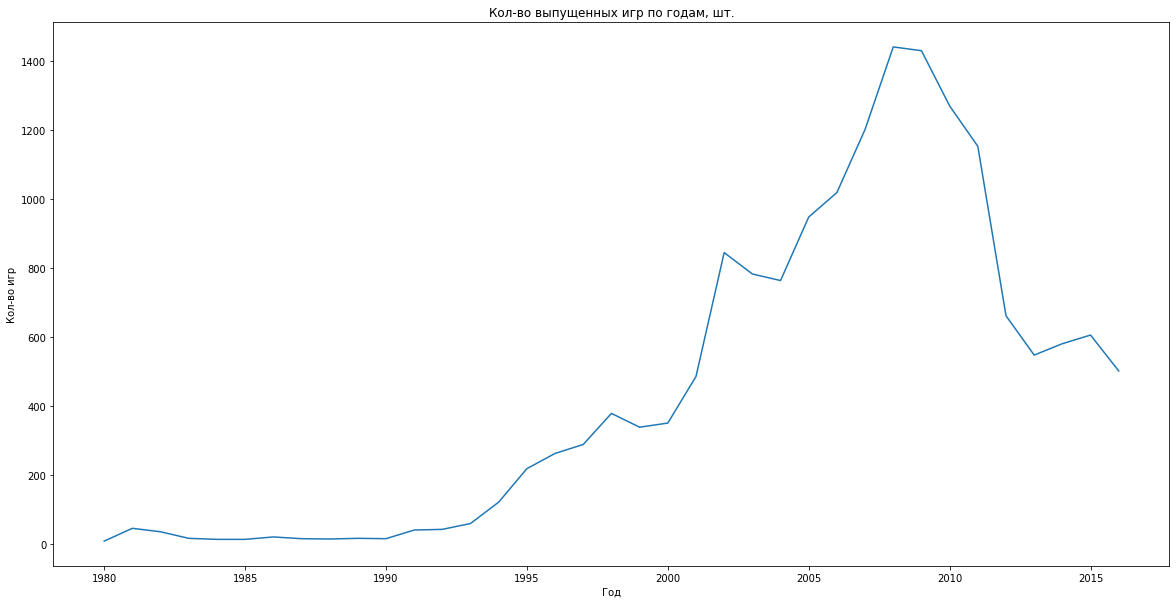

In [22]:
plt.figure(figsize=(20,10))
plt.title('Кол-во выпущенных игр по годам, шт.')
plt.plot(games_by_years.index, games_by_years['quantity'])
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.show();

Заметим, что актуальным периодом для анализа являются последние 5 лет (2012-2016 гг.), т.к. этот период более стационарен, в сравнении с предыдущими годами. 

Посчитаем, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и посмотрим распределение по годам.

In [23]:
top_platforms_pivot = data.pivot_table(index='platform',
                                       values='total_sales',
                                       aggfunc='sum').sort_values('total_sales', ascending=False).reset_index()

top_platforms_pivot

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Выберем те игроавые платформы, у которых суммарные продажи выше 80%-квантиля.

In [24]:
quantile_80_by_tota_sales = top_platforms_pivot['total_sales'].quantile(q=0.8)

top_platforms = top_platforms_pivot.loc[(top_platforms_pivot['total_sales'] >= quantile_80_by_tota_sales, 
                                         'platform')].to_list()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA']

Выберем из датафрейма `data` те игры, у которых наименование платформы входит в список `top_platforms`.

In [25]:
data_filted_by_platfoms = data.query('platform in @top_platforms').reset_index(drop=True)
data_filted_by_platfoms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Построим сводную таблицу `data_filted_by_platfoms_pivot`.

In [26]:
data_filted_by_platfoms_pivot = data_filted_by_platfoms.pivot_table(index=['platform', 'year_of_release'],
                                                                    values='total_sales',
                                                                    aggfunc='sum').reset_index()
data_filted_by_platfoms_pivot

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,147.23
...,...,...,...
71,X360,2012,100.72
72,X360,2013,88.58
73,X360,2014,34.74
74,X360,2015,11.96


Построим распределение распределение по годам.

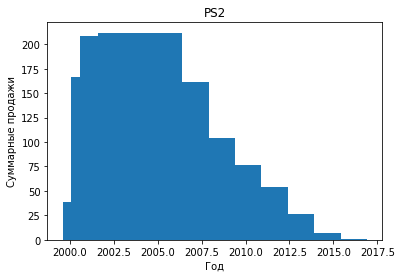

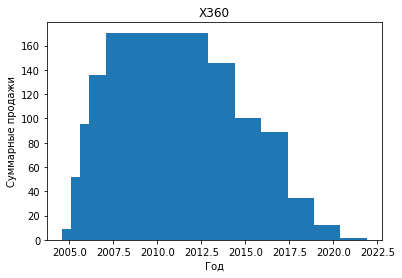

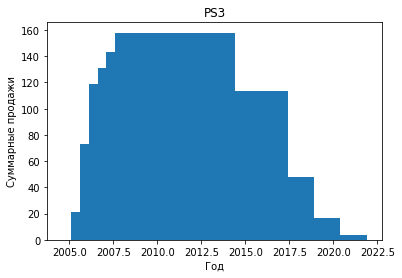

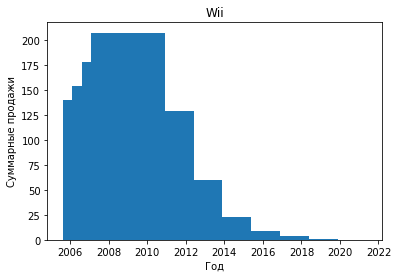

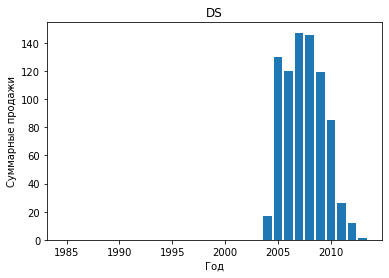

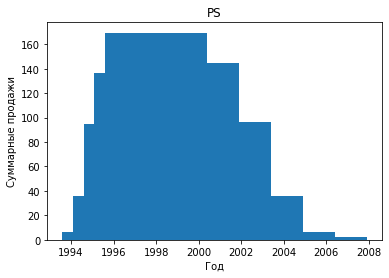

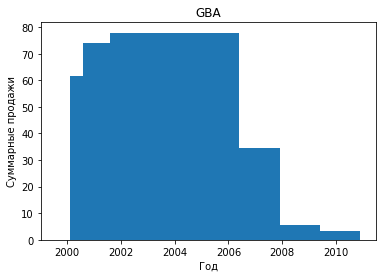

In [27]:
for platform in top_platforms:
    plt.title(platform)
    plt.bar(
        data_filted_by_platfoms_pivot.loc[data_filted_by_platfoms_pivot['platform'] == platform, 'year_of_release'],
        data_filted_by_platfoms_pivot.loc[data_filted_by_platfoms_pivot['platform'] == platform, 'total_sales'])
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    print()
    plt.show();

Посчитаем, за какой характерный срок появляются новые и исчезают старые платформы. Для это определим для каждой платформы первый и последний год выхода игры (`year_of_release`), а затем найдем продолжительность выхода игр (`duration`). При этом мы не будем включать в данный анализ актуальные платформы (`top_platforms`), т.к. период их жизни еще продолжается. Также проверим данные на наличие аномалий: возможно есть такие строки, у которых продажи равняются 0, при этом имеется год выхода игры - такие значения могут сильно менять продолжительность жизни платформ.

In [28]:
df_duration_pivot = data.query('platform not in @top_platforms').pivot_table(index='platform',
                                         values='year_of_release',
                                         aggfunc=(np.min, np.max))
df_duration_pivot['duration'] = df_duration_pivot['amax'] - df_duration_pivot['amin']
df_duration_pivot

,amax,amin,duration
platform,,,
2600,1994,1980,14
3DO,1995,1994,1
3DS,2016,2000,16
DC,2008,1998,10
GB,2001,1988,13
GC,2007,2001,6
GEN,1994,1990,4
GG,1992,1992,0
N64,2004,1996,8


In [29]:
data.query('(platform not in @top_platforms) & (total_sales == 0)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Строк, содержащих аномалии, нет.

Найдем медианное значение продолжительности выхода игр, т.е. характерный срок актуальности платформ.

In [30]:
print('Характерный срок актуальности платформ: {} лет'.format(df_duration_pivot['duration'].median()))

Характерный срок актуальности платформ: 5.0 лет


#### Вывод

Наиболее популярные платформы, считая по суммарным продажам игр за все года, являются `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS` и `PS4`. Анализ показал, что каждая платформа в среднем устаревает за 5 лет.

#### 3.2. Анализ лидирующих платформ по продажам за актуальный период <a id='top_platforms'></a> 

Как было указано в параграфе `3.1.` актуальным периодом для анализа являются последние 5 лет, т.е. 2012-2016 гг.

In [31]:
actual_data = data[(data['year_of_release'] >= 2012) & (data['year_of_release'] <= 2016)].reset_index(drop=True)
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Определим, какие платформы лидируют по продажам.

In [32]:
top_platfoms_actual_data = actual_data.pivot_table(index='platform',
                                           values='total_sales',
                                           aggfunc='sum').sort_values('total_sales', ascending=False)
top_platfoms_actual_data.head()

,total_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32


Наиболее лидирующие по продажам платформы являются `PS4`, `PS3`, `X360`, `3DS` и `XOne`.

Проанализурем динамику суммарных продаж каждой платформы за актуальный период и определим, какие из них растут, а какие падают.

In [33]:
top_platfoms_by_years_actual_data = actual_data.pivot_table(index=['platform', 'year_of_release'],
                                                                    values='total_sales',
                                                                    aggfunc='sum').reset_index()
top_platfoms_by_years_actual_data.head()

,platform,year_of_release,total_sales
0,3DS,2012,51.76
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14


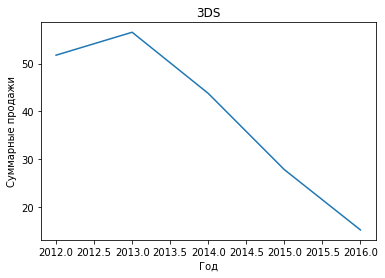

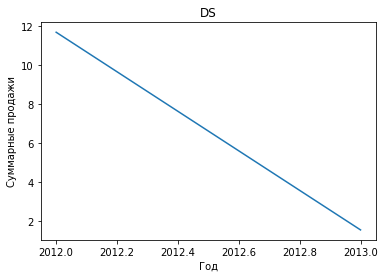

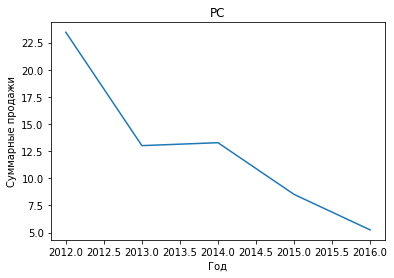

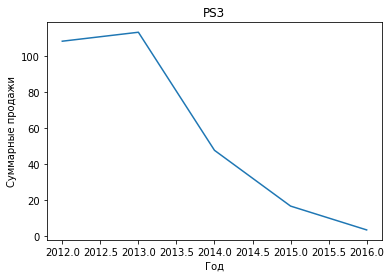

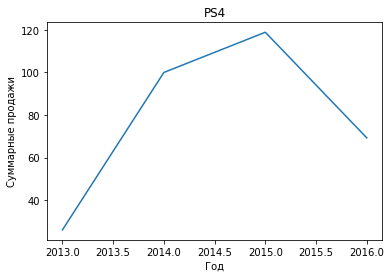

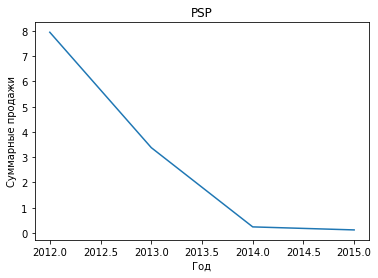

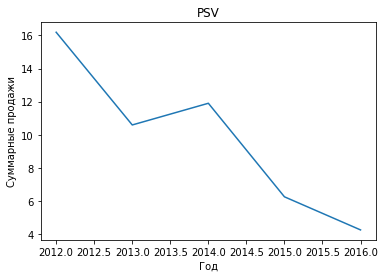

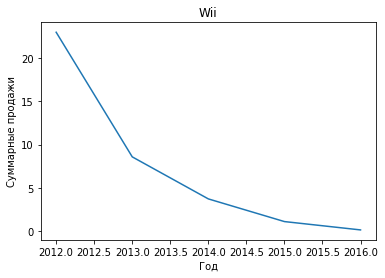

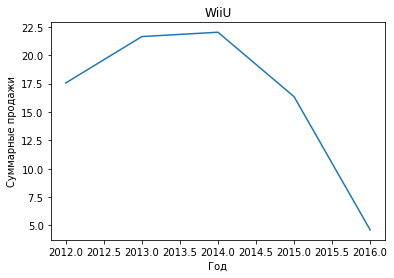

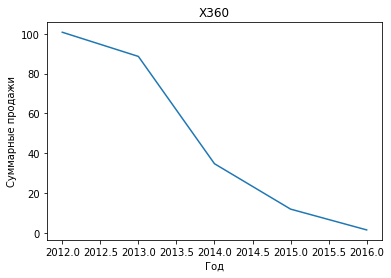

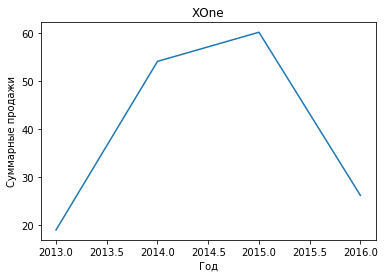

In [34]:
for platform in top_platfoms_by_years_actual_data['platform'].unique():
    plt.title(platform)
    plt.plot(
        top_platfoms_by_years_actual_data.loc[top_platfoms_by_years_actual_data['platform'] == platform, 'year_of_release'],
        top_platfoms_by_years_actual_data.loc[top_platfoms_by_years_actual_data['platform'] == platform, 'total_sales'])
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    print()
    plt.show();

#### Вывод

Заметим, что к 2016 году спад глобальных продаж наблюдается у всех платформ. Однако за пару лет до 2016 года наблюдался рост продаж у платформ `PS4` и `XOne`, поэтому их можно назвать наиболее прибыльными.

#### 3.3. Распределение глобальных продаж игр в разбивке по платформам <a id='distribution_of_globales_sales_by_platforms'> 

Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

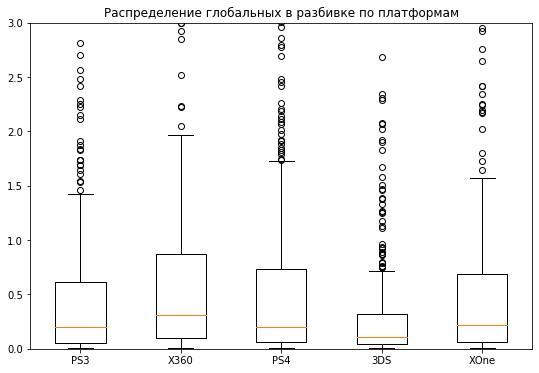

In [35]:
ps3 = actual_data.loc[actual_data['platform'] == 'PS3', 'total_sales']
x360 = actual_data.loc[actual_data['platform'] == 'X360', 'total_sales']
ps4 = actual_data.loc[actual_data['platform'] == 'PS4', 'total_sales']
ds3 = actual_data.loc[actual_data['platform'] == '3DS', 'total_sales']
xone = actual_data.loc[actual_data['platform'] == 'XOne', 'total_sales']

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.title('Распределение глобальных в разбивке по платформам')
ax.boxplot([ps3, x360, ps4, ds3, xone])
ax.set_xticklabels(['PS3', 'X360', 'PS4', '3DS', 'XOne'])
ax.set_ylim(bottom=0, top=3)
plt.show();

#### Вывод

Все платформы имеют аномально высокие глобальные продажи. Однако, наименьший разброс продаж имеет платформа `3DS`. Разница в распределениях продаж по каждой платформе, возможно, связана с тем, что некоторые платформы являются локальными и, соответственно, игры на такие платформы по-разному продаются в разных регионах: в каком-то регионе высокие продажи, а в других низкие, поэтому такой большой общий разброс. Другие же платформы являются общемировыми, а значит игры по ним продаются в различных регионах примерно одинаково, соответственно, общий разброс низкий.

#### 3.4. Анализ влияния отзыва пользователей и критиков на продажи внутри популярных платформ<a id='impact_of_scores'></a>

Построем для популярных платформ (`PS4` и `XOne`) диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [36]:
print('Корреляционная матрица для игр на платформе PS4')
display(actual_data.loc[actual_data['platform'] == 'PS4', ['total_sales', 'critic_score', 'user_score']].corr())

Корреляционная матрица для игр на платформе PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [37]:
print('Корреляционная матрица для игр на платформе Xbox One')
display(actual_data.loc[actual_data['platform'] == 'XOne', ['total_sales', 'critic_score', 'user_score']].corr())

Корреляционная матрица для игр на платформе Xbox One


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


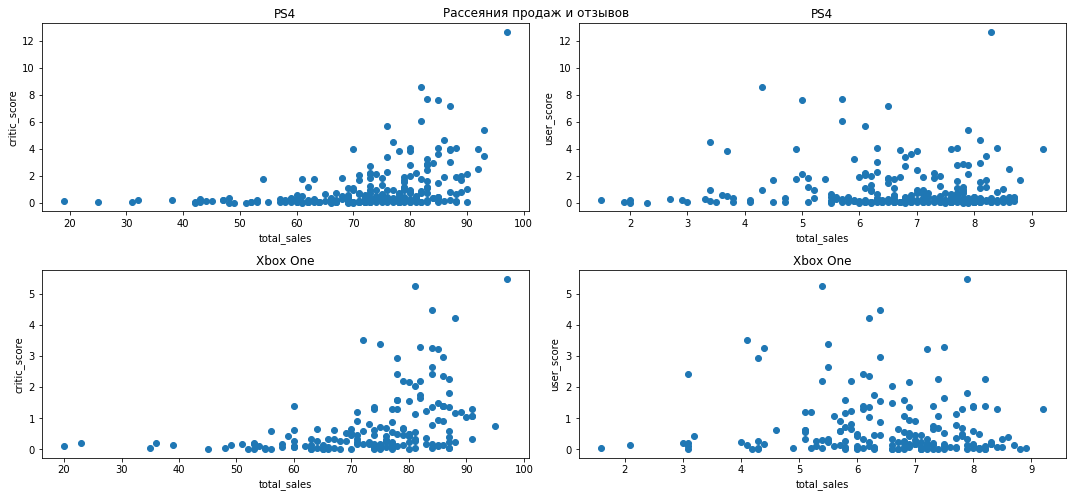

In [38]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

fig.suptitle('Рассеяния продаж и отзывов')

ax1.set_title('PS4')
ax1.scatter(actual_data.loc[actual_data['platform'] == 'PS4', 'critic_score'], actual_data.loc[actual_data['platform'] == 'PS4', 'total_sales'])
ax1.set_xlabel('total_sales')
ax1.set_ylabel('critic_score')
ax2.set_title('PS4')
ax2.scatter(actual_data.loc[actual_data['platform'] == 'PS4', 'user_score'], actual_data.loc[actual_data['platform'] == 'PS4', 'total_sales'])
ax2.set_xlabel('total_sales')
ax2.set_ylabel('user_score')

ax3.set_title('Xbox One')
ax3.scatter(actual_data.loc[actual_data['platform'] == 'XOne', 'critic_score'], actual_data.loc[actual_data['platform'] == 'XOne', 'total_sales'])
ax3.set_xlabel('total_sales')
ax3.set_ylabel('critic_score')
ax4.set_title('Xbox One')
ax4.scatter(actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'], actual_data.loc[actual_data['platform'] == 'XOne', 'total_sales'])
ax4.set_xlabel('total_sales')
ax4.set_ylabel('user_score')

fig.tight_layout()
plt.show();

Дополнительно посмотрим зависимость глобальных продаж с оценками критиков и пользователей для других платформ.

In [39]:
actual_data.loc[~actual_data['platform'].isin(['PS4', 'XOne']), ['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.270267,0.018036
critic_score,0.270267,1.000000,0.520816
user_score,0.018036,0.520816,1.000000


#### Вывод

Как для перспективных платформ (`PS4` и `Xbox One`), так и для остальных платформ, можно утверждать, что связь глобальных продаж игр с оценками пользователей отсутствует. Связь оценок критиков с глобальными продажами есть, но слабая, при чем у игр на платформе `PS4` она больше.

Интуитивно можно предположить, что критики более объективно и лучше оценивают успешность игры (продажи), чем пользователи. Собственно, поэтому таких людей и называют критиками за их компетентность. Корреляционные анализ лишь подтвердил это.

#### 3.5.  Распределение игр по жанрам <a id='distribution_by_genres'></a>

Посмотрим на распределение глобальных продаж игр по жанрам.

In [40]:
top_genres_actual_data = actual_data.pivot_table(index='genre',
                                                values='total_sales',
                                                aggfunc='sum').sort_values('total_sales', ascending=False)

top_genres_actual_data

,total_sales
genre,
Action,446.41
Shooter,304.75
Role-Playing,192.80
Sports,181.07
Misc,85.28
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


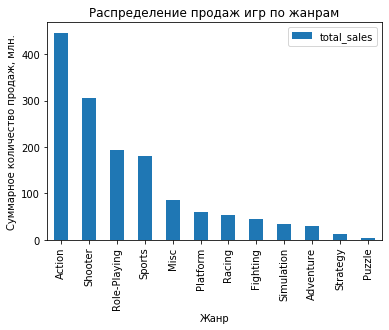

In [41]:
top_genres_actual_data.plot(kind='bar', title='Распределение продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарное количество продаж, млн.')
plt.show();

Дополнительно посмотрим на количество выпущенных игр по жанрам

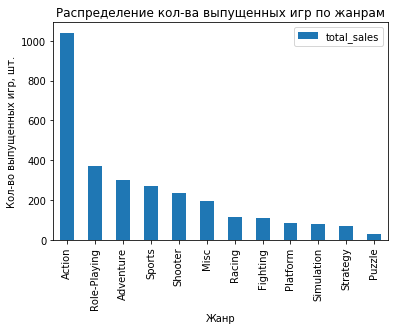

In [42]:
top_genres_actual_data_1 = actual_data.pivot_table(index='genre',
                              values='total_sales',
                              aggfunc='count').sort_values('total_sales', ascending=False)

top_genres_actual_data_1.plot(kind='bar', title='Распределение кол-ва выпущенных игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Кол-во выпущенных игр, шт.')
plt.show();

#### Вывод

Наиболее прибыльными жанрами являются `Action`, `Shooter`, `Role-Playing` и `Sports`. Заметнее всего выделяются игры жанра `Action`.

### Шаг 4. Портрет пользователя каждого региона  (NA, EU, JP) <a id='portret_of_users'></a>

Для дальнейшего удобства определим функцию, которая создает сводную таблицу, сгруппированную по необходимому столбцу.

In [43]:
def tops_pivot_table(index, column):
    pivot_table = actual_data.pivot_table(index=index,
                                           values=(column, 'total_sales'),
                                           aggfunc='sum',
                                           dropna=False).sort_values(column, ascending=False)
    pivot_table['share_of_total'] = (pivot_table[column] / pivot_table['total_sales']).round(2)
    return pivot_table

Чтобы учитывать игры без рейтинга, заполним пропуски в столбце `rating` значением `unrated`.

In [44]:
actual_data.loc[actual_data['rating'].isnull(), 'rating'] = 'unrated'

#### 4.1. Североамериканский регион (`NA`) <a id='na'></a>

Самые популярные платфоры.

In [45]:
na_top_platforms = tops_pivot_table(index='platform', column='na_sales')
na_top_platforms

,na_sales,total_sales,share_of_total
platform,,,
X360,140.57,237.52,0.59
PS4,108.74,314.14,0.35
PS3,103.74,289.71,0.36
XOne,93.12,159.32,0.58
3DS,55.49,195.01,0.28
WiiU,38.10,82.19,0.46
PC,19.26,63.51,0.30
Wii,18.14,36.60,0.50
PSV,10.98,49.18,0.22


Наиболее популярными платформами в североамериканском регионе являются `X360`, `PS4` и `PS3`, при чем доля продаж игр на платформе `X360` в североамерикансом регионе составляет больше половине от общемировой суммы продаж.  

Определим наиболее популярные жанры игр в североамериканском регионе.

In [46]:
na_top_genres = tops_pivot_table('genre', column='na_sales')
na_top_genres

,na_sales,total_sales,share_of_total
genre,,,
Action,180.15,446.41,0.40
Shooter,144.79,304.75,0.48
Sports,81.53,181.07,0.45
Role-Playing,64.00,192.80,0.33
Misc,38.19,85.28,0.45
Platform,25.38,61.00,0.42
Fighting,19.79,44.49,0.44
Racing,17.22,53.50,0.32
Adventure,8.92,29.43,0.30


Как и общемировой тренд, в североамериканском регионе наиболее популярными жанрами являются `Action`, `Shooter` и `Sports`.

Определим, влияет ли рейтинг ESRB на продажи в североамериканском регионе.

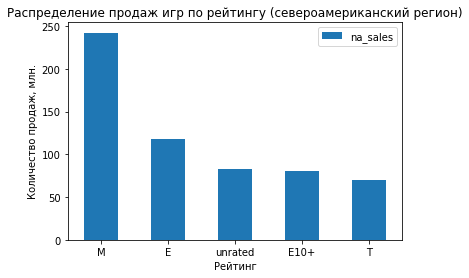

In [47]:
na_ratings_pivot = tops_pivot_table(index='rating', column='na_sales')
na_ratings_pivot.plot(y='na_sales', kind='bar', rot=0, title='Распределение продаж игр по рейтингу (североамериканский регион)')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж, млн.')
plt.show();

Заметим, что игры с рейтингом для взрослых (`M`) заметно лучше продаются, чем игры с другими рейтингами. Поэтому можно утверждать, что рейтинг ESRB влияет на продажи в североамериканском регионе.

#### 4.2. Европейский регион (`EU`) <a id='eu'></a>

Самые популярные платфоры.

In [48]:
eu_top_platforms = tops_pivot_table(index='platform', column='eu_sales')
eu_top_platforms

,eu_sales,total_sales,share_of_total
platform,,,
PS4,141.09,314.14,0.45
PS3,107.27,289.71,0.37
X360,74.89,237.52,0.32
XOne,51.59,159.32,0.32
3DS,42.83,195.01,0.22
PC,38.38,63.51,0.60
WiiU,25.13,82.19,0.31
Wii,12.34,36.60,0.34
PSV,11.36,49.18,0.23


Наиболее популярными платформами в европейском регионе являются `PS4`, `PS3` и `X360`, т.е. в Европе в отличие от Северной Америки наиболее популярны платформы `Play Station`. 

Определим наиболее популярные жанры игр в европейском регионе.

In [49]:
eu_top_genres = tops_pivot_table('genre', column='eu_sales')
eu_top_genres

,eu_sales,total_sales,share_of_total
genre,,,
Action,161.70,446.41,0.36
Shooter,113.47,304.75,0.37
Sports,69.09,181.07,0.38
Role-Playing,48.53,192.80,0.25
Racing,27.29,53.50,0.51
Misc,26.32,85.28,0.31
Platform,21.41,61.00,0.35
Simulation,14.55,35.12,0.41
Fighting,10.79,44.49,0.24


Как и в общемировом тренде, в европейском регионе наиболее популярными жанрами являются `Action`, `Shooter` и `Sports`.

Определим, влияет ли рейтинг ESRB на продажи в европейском регионе.

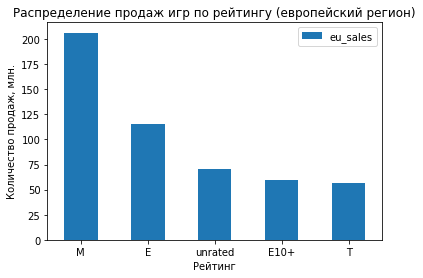

In [50]:
eu_ratings_pivot = tops_pivot_table(index='rating', column='eu_sales')
eu_ratings_pivot.plot(y='eu_sales', kind='bar', rot=0, title='Распределение продаж игр по рейтингу (европейский регион)')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж, млн.')
plt.show();

Заметим, что игры с рейтингом для взрослых (`M`) заметно лучше продаются (как и в Северной Америке), чем игры с другими рейтингами. Поэтому можно утверждать, что рейтинг ESRB влияет на продажи в европейском регионе.

#### 4.3. Япония (`JP`) <a id='jp'></a>

Самые популярные платфоры в Японии.

In [51]:
jp_top_platforms = tops_pivot_table(index='platform', column='jp_sales')
jp_top_platforms

,jp_sales,total_sales,share_of_total
platform,,,
3DS,87.79,195.01,0.45
PS3,35.29,289.71,0.12
PSV,21.04,49.18,0.43
PS4,15.96,314.14,0.05
WiiU,13.01,82.19,0.16
PSP,10.71,11.69,0.92
DS,3.72,13.21,0.28
Wii,3.39,36.60,0.09
X360,1.57,237.52,0.01


Наиболее популярными платформами в Японии являются `3DS`, `PS3` и `PSV`, что кардинально отличается от показателей в Северной Америке и Европы. Стоит заметить, что перечисленные платформы являются портативными, поэтому можно утверждать, что в Японии лучше продаются игры для портативных игровых платформ. 

Определим наиболее популярные жанры игр в Японии.

In [52]:
jp_top_genres = tops_pivot_table('genre', column='jp_sales')
jp_top_genres

,jp_sales,total_sales,share_of_total
genre,,,
Role-Playing,65.44,192.80,0.34
Action,52.80,446.41,0.12
Misc,13.10,85.28,0.15
Simulation,10.41,35.12,0.30
Fighting,9.44,44.49,0.21
Shooter,9.23,304.75,0.03
Platform,8.63,61.00,0.14
Adventure,8.24,29.43,0.28
Sports,8.01,181.07,0.04


В Японии (в отличие от Северной Америки и Европы) наиболее популярными жанрами являются `Role-Playing` и `Action`. Главная причина отличия японского игрового рынка от остальных - это японская культара и менталитет.

Определим, влияет ли рейтинг ESRB на продажи в Японии.

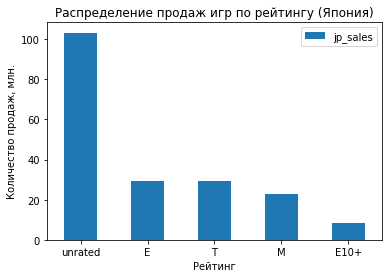

In [53]:
jp_ratings_pivot = tops_pivot_table(index='rating', column='jp_sales')
jp_ratings_pivot.plot(y='jp_sales', kind='bar', rot=0, title='Распределение продаж игр по рейтингу (Япония)')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж, млн.')
plt.show();

Заметим, что в Японии (в отличие от Северной Америки и Европы) значительное число игр без рейтинга ESRB. Но с другой стороны, те игры, которым присвоен рейтинг ESRB, не сильно отличаются друг от другам по продажам. </font> Поэтому можно утверждать, что рейтинг ESRB сильно влияет на продажи в Японии.

#### 4.4. Остальные страны (`Other`) <a id='other'></a>

Самые популярные платфоры в остальных странах.

In [54]:
other_top_platforms = tops_pivot_table(index='platform', column='other_sales')
other_top_platforms

,other_sales,total_sales,share_of_total
platform,,,
PS4,48.35,314.14,0.15
PS3,43.41,289.71,0.15
X360,20.49,237.52,0.09
XOne,14.27,159.32,0.09
3DS,8.90,195.01,0.05
WiiU,5.95,82.19,0.07
PC,5.87,63.51,0.09
PSV,5.80,49.18,0.12
Wii,2.73,36.60,0.07


Наиболее популярными платформами в остальных странах, как и в европейском регионе, являются `PS4`, `PS3` и `X360`.

Определим наиболее популярные жанры игр в остальных странах.

In [55]:
other_top_genres = tops_pivot_table('genre', column='other_sales')
other_top_genres

,other_sales,total_sales,share_of_total
genre,,,
Action,51.76,446.41,0.12
Shooter,37.26,304.75,0.12
Sports,22.44,181.07,0.12
Role-Playing,14.83,192.80,0.08
Misc,7.67,85.28,0.09
Racing,6.49,53.50,0.12
Platform,5.58,61.00,0.09
Fighting,4.47,44.49,0.10
Adventure,2.81,29.43,0.10


Как и в общемировом тренде, в остальных странах наиболее популярными жанрами являются `Action`, `Shooter` и `Sports`.

Определим, влияет ли рейтинг ESRB на продажи в остальных странах.

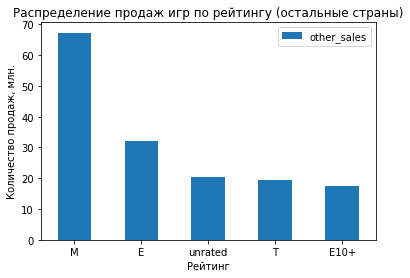

In [56]:
other_ratings_pivot = tops_pivot_table(index='rating', column='other_sales')
other_ratings_pivot.plot(y='other_sales', kind='bar', rot=0, title='Распределение продаж игр по рейтингу (остальные страны)')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж, млн.')
plt.show();

Заметим, что игры с рейтингом для взрослых (`M`) заметно лучше продаются (как в Северной Америке и Европе), чем игры с другими рейтингами. Поэтому можно утверждать, что рейтинг ESRB влияет на продажи в остальных странах.

#### Вывод

Заметим, что наиболее популярными платформами в Европе и в остальном мире (не включая Сев. Америку и Японию) являются игровые платформы `Play Station` в то время, как в Северной Америке - `Xbox One`. При этом в Японии пользуются спросом игры для портативных консолей - `3DS`, `PSV`, и для `PS3`.

Аналогичным образом Япония выделяется по предпочитаемым жанрам игр: на первом месте по популярности жанр `Role-Playing`. В Северной Америке, Европе и остальных странах наиболее популярны игры жанров `Action`, `Shooter` и `Sports`.

Было установлено, что только в Японии рейтинг `ESRB` не влияет на продажи игр, в то время, как в Северной Америке, Европе и остальных странах наиболее популярны игры с рейтингом для взрослых (`M`).

### Шаг 5. Проверка гипотез <a id='hypotheses'></a>

Чтобы проверить гипотезы о различии средних двух генеральных совокупностей по взятым из них выборкам, применим метод `.ttest_ind`, т.к. генеральные совокупности разные и, соответственно, независимы.

#### 5.1. Гипотеза о равенстве средних пользовательских оценок платформ Xbox One и PC <a id='xone_pc_means'></a>

Проверим гипотезу о равенстве средних пользовательских оценок платформ `Xbox One` и `PC`. Для начала посчитаем средние пользовательские оценки для данных игровых платформ.

In [57]:
xone_mean = actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'].mean()
pc_mean = actual_data.loc[actual_data['platform'] == 'PC', 'user_score'].mean()

print('Средняя пользовательская оценка для платформы Xbox One: {:.2f}'.format(xone_mean))
print('Средняя пользовательская оценка для платформы PC: {:.2f}'.format(pc_mean))

Средняя пользовательская оценка для платформы Xbox One: 6.52
Средняя пользовательская оценка для платформы PC: 6.45


Сформируем выборки.

In [58]:
xone_sample = actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'].dropna()
pc_sample = actual_data.loc[actual_data['platform'] == 'PC', 'user_score'].dropna()

Прежде, чем произвести проверку гипотезы о равенстве средних через t-критерий Стьюдента, необходимо произвести проверку равенства дисперсий выборок, чтобы понять с каким значением использовать параметр `equal_var` в методе `.ttest_ind`. Проверим гипотезу о равенстве дисперсий выборок с помощью теста Левена (метод `.levene`).

In [59]:
xone_var = actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'].var()
pc_var = actual_data.loc[actual_data['platform'] == 'PC', 'user_score'].var()

print('Дисперсия пользовательских оценкок для платформы Xbox One: {:.2f}'.format(xone_var))
print('Дисперсия пользовательских оценкок для платформы PC: {:.2f}'.format(pc_var))

Дисперсия пользовательских оценкок для платформы Xbox One: 1.91
Дисперсия пользовательских оценкок для платформы PC: 2.75


Сформулируем нулевую гипотезу о равенстве дисперсий.

Нулевая и альтернативные гипотезы:
<br>-H0: дисперсии пользовательских оценок платформ Xbox One и PC равны между собой;</br>
<br>-H1: дисперсии пользовательских оценок платформ Xbox One и PC различаются;</br>

Проверим нашу нулевую гипотезу с помощью метода `.levene`.

In [60]:
alpha = .05

results = st.levene(
    xone_sample, 
    pc_sample,
    center='mean')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.004697715245950616
Отвергаем нулевую гипотезу


Значение p-value теста Левена ниже уровня значимости, поэтому можно утверждать, что дисперсии пользовательских оценок по двум выборкам разные. Значит при проверке гипотезы о равенстве выборочных средних в методе `ttest_ind` укажем параметр `equal_var=False`.

Сформулируем нулевую (`H0`) и альтернативную (`H1`) гипотезы о равенстве средних пользовательских оценок:
<br>-H0: средние пользовательские оценки платформ `Xbox One` и `PC` равны между собой;</br>
<br>-H1: средние пользовательские оценки платформ `Xbox One` и `PC` различаются;</br>

<br>Проверим нулевую гипотезу с помощью метода `.ttest_ind`.</br>

In [61]:
alpha = .05

results = st.ttest_ind(
    xone_sample, 
    pc_sample,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6206366351489678
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние оценки пользователей `Xbox One` и `PC` неодинаковы, но с вероятностью почти 24% такое или большее различие можно получить случайно. Это большая вероятность, чтобы делать вывод о значимом различии между средними оценкаим пользователей.

#### 5.2. Гипотеза о различии средних пользовательских оценок жанров `Action` и `Sports` <a id='action_sports_means'></a>

Проверим гипотезу о различии средних пользовательских оценок жанров `Action` и `Sports`. Для начала посчитаем средние пользовательские оценки для данных жанров.

In [62]:
action_mean = actual_data.loc[actual_data['genre'] == 'Action', 'user_score'].mean()
sports_mean = actual_data.loc[actual_data['genre'] == 'Sports', 'user_score'].mean()

print('Средняя пользовательская оценка для жанра "Action": {:.2f}'.format(action_mean))
print('Средняя пользовательская оценка для жанра "Sports": {:.2f}'.format(sports_mean))

Средняя пользовательская оценка для жанра "Action": 6.83
Средняя пользовательская оценка для жанра "Sports": 5.46


Сформируем соответствующие выборки.

In [63]:
action_sample = actual_data.loc[actual_data['genre'] == 'Action', 'user_score'].dropna()
sports_sample = actual_data.loc[actual_data['genre'] == 'Sports', 'user_score'].dropna()

Прежде, чем произвести проверку гипотезы о равенстве средних через t-критерий Стьюдента, необходимо произвести проверку равенства дисперсий выборок, чтобы понять с каким значением использовать параметр `equal_var` в методе `.ttest_ind`. Проверим гипотезу о равенстве дисперсий выборок с помощью теста Левена (метод `.levene`).

In [64]:
action_var = actual_data.loc[actual_data['genre'] == 'Action', 'user_score'].var()
sports_var = actual_data.loc[actual_data['genre'] == 'Sports', 'user_score'].var()

print('Дисперсия пользовательских оценкок для жанра "Action": {:.2f}'.format(action_var))
print('Дисперсия пользовательских оценкок для жанра "Sports": {:.2f}'.format(sports_var))

Дисперсия пользовательских оценкок для жанра "Action": 1.88
Дисперсия пользовательских оценкок для жанра "Sports": 3.02


Сформулируем нулевую гипотезу о равенстве дисперсий.

Нулевая и альтернативные гипотезы:
<br>-H0: дисперсии пользовательских оценок для жанров "Action" и "Sports" равны между собой;</br>
<br>-H1: дисперсии пользовательских оценок для жанров "Action" и "Sports" различаются;</br>

Проверим нашу нулевую гипотезу с помощью метода `.levene`.

In [65]:
alpha = .05

results = st.levene(
    action_sample, 
    sports_sample,
    center='mean')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.966250544509065e-06
Отвергаем нулевую гипотезу


Значение p-value теста Левена ниже уровня значимости, поэтому можно утверждать, что дисперсии пользовательских оценок по двум жанрам разные. Значит при проверке гипотезы о равенстве выборочных средних в методе `ttest_ind` укажем параметр `equal_var=False`.

Сформулируем нулевую (`H0`) и альтернативную (`H1`) гипотезы:
<br>-H0: средние пользовательские оценки жанров `Action` и `Sports` равны между собой;</br>
<br>-H1: средние пользовательские оценки жанров `Action` и `Sports` различаются;</br>
<br>Проверим нулевую гипотезу с помощью метода `.ttest_ind`.</br>

In [66]:
alpha = .05

results = st.ttest_ind(
    action_sample, 
    sports_sample,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.337200239591976e-20
Отвергаем нулевую гипотезу


Средние пользовательские оценки различаются. Т.к. p-value крайне мало (и меньше уровня значимости), то мы отвергаем нулевую гипотезу, и можем считать, что средние пользовательские оценки жанров `Action` и `Sports` действительно различаются.

### Шаг 6. Общий вывод <a id='conclusion'></a>

- В `Шаге 2` была проведена предобработка данных: столбцы, которые содержали некорректные типы данных, были приведены соответствующим по смыслу типам данных. Были заполнены/удалены пустые значения в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating`;
- В `Шаге 3` был выбран актуальный период для анализа (2012-2016 гг.), а также определены наиболее популярные игровые платформы - `PS4`, `XOne`, `PS3` и `PC`. Было также исследовано влияние оценок пользователей и критиков на суммарные продажи. Анализ показал, что оценки пользователей не влияют на продажи в то время, как оценки критиков имеют небольшую связь с суммарными продажами игр;
- В `Шаге 4` было проведено исследование по определению самых популярных платформ и жанров, а также по влиянию рейтинга `ESRB` на продажи игр для каждого региона. Было выявлено, что наиболее популярными платформами в Европе и в остальном мире (не включая Сев. Америку и Японию) являются игровые платформы `Play Station` в то время, как в Северной Америке - `Xbox One`. При этом в Японии пользуются спросом игры для портативных консолей - `3DS`, `PSV`, и для `PS3`.
<br>Аналогичным образом Япония выделяется по предпочитаемым жанрам игр: на первом месте по популярности жанр `Role-Playing`. В Северной Америке, Европе и остальных странах наиболее популярны игры жанров `Action`, `Shooter` и `Sports`.</br>
<br>Было установлено, что только в Японии рейтинг `ESRB` не влияет на продажи игр, в то время, как в Северной Америке, Европе и остальных странах наиболее популярны игры с рейтингом для взрослых (`M`);</br>
- В `Шаге 5` был провед анализ гипотез: о равенстве средних пользовательских оценок платформ `Xbox One` и `PC`, и о различии средних пользовательских оценок жанров `Action` и `Sports`.
<br>Установлено, что средние пользовательские оценки платформ `Xbox One` и `PC` равны, а средние пользовательские оценки жанров `Actions` и `Sports` различаются.</br>